In [377]:
import numpy as np
import matplotlib.pyplot as plt

In [380]:
def true_function(x):
    return x**2

def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

In [382]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
      self.W1 = np.random.uniform(0, 1, size=(input_size, hidden_size[0]))
      self.b1 = np.random.uniform(0, 1, size=(hidden_size[0],))
      self.W2 = np.random.uniform(0, 1, size=(hidden_size[0], hidden_size[1]))
      self.b2 = np.random.uniform(0, 1, size=(hidden_size[1],))
      self.W3 = np.random.uniform(0, 1, size=(hidden_size[1], output_size))
      self.b3 = np.random.uniform(0, 1, size=(output_size,))
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.maximum(0, self.z1)  
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = np.maximum(0, self.z2)
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        return self.z3
    
    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        
        # calculate gradient
        delta3 = self.z3 - y
        dW3 = np.dot(self.a2.T, delta3) / m
        db3 = np.sum(delta3, axis=0) / m
        delta2 = np.dot(delta3, self.W3.T) * (self.z2 > 0)
        dW2 = np.dot(self.a1.T, delta2) / m
        db2 = np.sum(delta2, axis=0) / m
        delta1 = np.dot(delta2, self.W2.T) * (self.z1 > 0)  
        dW1 = np.dot(X.T, delta1) / m
        db1 = np.sum(delta1, axis=0) / m
        
        # update weight and bias
        self.W3 -= learning_rate * dW3
        self.b3 -= learning_rate * db3
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

In [394]:
input_size = 1
hidden_size = [8,8]
output_size = 1
learning_rate = 0.01
num_epochs = 10000

# create dataset
X_train = np.linspace(-5, 5, 1000).reshape(-1, 1)  # داده‌های آموزشی X
y_train = true_function(X_train)  # داده‌های آموزشی y

# create MLP
mlp = MLP(input_size, hidden_size, output_size)

# train MLP
for epoch in range(num_epochs):
    # forward
    y_pred = mlp.forward(X_train)
    
    # calculate loss
    loss = mse_loss(y_pred, y_train)
    
    # claculate gradint and update weight
    mlp.backward(X_train, y_train, learning_rate)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss}')

X_test = np.linspace(-3, 3, 100).reshape(-1, 1) 
y_test_predicted = mlp.forward(X_test) 

Epoch: 100/10000, Loss: 2.718856580644225
Epoch: 200/10000, Loss: 0.6841090374672335
Epoch: 300/10000, Loss: 1.9367505844247581
Epoch: 400/10000, Loss: 1.0458699980488146
Epoch: 500/10000, Loss: 0.7839930966145955
Epoch: 600/10000, Loss: 0.6629315713350568
Epoch: 700/10000, Loss: 0.5856179130370717
Epoch: 800/10000, Loss: 0.5134829270374206
Epoch: 900/10000, Loss: 0.44466335602408724
Epoch: 1000/10000, Loss: 0.38286843127138764
Epoch: 1100/10000, Loss: 0.3337678297250709
Epoch: 1200/10000, Loss: 0.2937316986464383
Epoch: 1300/10000, Loss: 0.25951952627258723
Epoch: 1400/10000, Loss: 0.23185993270649913
Epoch: 1500/10000, Loss: 0.20951298590908463
Epoch: 1600/10000, Loss: 0.18864143706157296
Epoch: 1700/10000, Loss: 0.17396875362047523
Epoch: 1800/10000, Loss: 0.15816260371789514
Epoch: 1900/10000, Loss: 0.14628669166732686
Epoch: 2000/10000, Loss: 0.1356207635707248
Epoch: 2100/10000, Loss: 0.12508102441876992
Epoch: 2200/10000, Loss: 0.11579220559046174
Epoch: 2300/10000, Loss: 0.1071

In [398]:
X_test = np.linspace(-3, 3, 10000).reshape(-1, 1) 
y_test_predicted = mlp.forward(X_test) 
y_test_true=true_function(X_test)

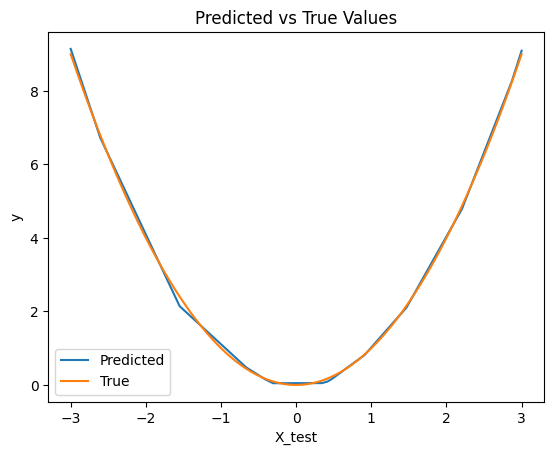

In [399]:
plt.plot(X_test, y_test_predicted, label='Predicted')
plt.plot(X_test, y_test_true, label='True')
plt.xlabel('X_test')
plt.ylabel('y')
plt.title('Predicted vs True Values')
plt.legend()
plt.show()

